# Keras tutorial - Rapid implementation of CNN

 Keras was developed to enable deep learning engineers to build and experiment with different models very quickly. Just as TensorFlow is a higher-level framework than Python, Keras is an even higher-level framework and provides additional abstractions. 

In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.


ModuleNotFoundError: ignored

**Note**: As you can see, we've imported a lot of functions from Keras. You can use them easily just by calling them directly in the notebook. Ex: `X = Input(...)` or `X = ZeroPadding2D(...)`.

## 1 - Model specification

Happiness  detection of faces.

<img src="images/happy-house.jpg" style="width:350px;height:270px;">
<caption><center> <u> <font color='purple'> **Figure 1** </u><font color='purple'>  : **the Happy House**</center></caption>


We run the following code to normalize the dataset and learn about its shapes.

In [0]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


**Details of the "Happy" dataset**:
- Images are of shape (64,64,3)
- Training: 600 pictures
- Test: 150 pictures

It is now time to solve the "Happy" Challenge.

## 2 -Keras model outline


```python
def model(input_shape):
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='HappyModel')
    
    return model
```

In [0]:

def HappyModel(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    
    
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)
    
    # Block 1
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2))(X)
    
    # Block 2
    X = Conv2D(32, (3, 3), strides = (1, 1),name = 'conv1', padding="same")(X)
    X = Activation('relu')(X)
    
    # MAXPOOL
    X = MaxPooling2D((2, 2),name="max_pool0")(X)
    
    # Block 3
    X = Conv2D(32, (3, 3), strides = (1, 1),name = 'conv2', padding="same")(X)
    X = Activation('relu')(X)
    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool1')(X)
    X = Dropout(rate=0.25,noise_shape=None, seed=None)(X)
    # Block 4
    X = Conv2D(64, (3, 3), strides = (1, 1),name = 'conv3', padding="same")(X)
    X = Activation('relu')(X)
    
    #Maxpool
    X = MaxPooling2D((2, 2), name='max_pool2')(X)
    
    # Block 5
    X = Conv2D(128, (3, 3), strides = (1, 1),name = 'conv4', padding="same")(X)
    X = Activation('relu')(X)
    
    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool3')(X)
    
    
    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='HappyModel')

        
    return model

In [0]:

def HappyModel2(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)
    
    # Block 1
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D(pool_size=(2, 2))(X)
    
    # Block 2
    X = Conv2D(32, (3, 3), strides = (1, 1),name = 'conv1', padding="same")(X)
    X = Activation('relu')(X)
    
    # MAXPOOL
    X = MaxPooling2D(pool_size=(2, 2),name="max_pool0")(X)
    
    # Block 3
    X = Conv2D(32, (3, 3), strides = (1, 1),name = 'conv2', padding="same")(X)
    X = Activation('relu')(X)
    # MAXPOOL
    X = MaxPooling2D(pool_size=(2, 2), name='max_pool1')(X)
    X = Dropout(rate=0.25)(X)
    # Block 4
    X = Conv2D(64, (3, 3), strides = (1, 1),name = 'conv3', padding="same")(X)
    X = Activation('relu')(X)
    
    #Maxpool
    X = MaxPooling2D(pool_size=(2, 2), name='max_pool2')(X)
    
    # Block 5
    X = Conv2D(128, (3, 3), strides = (1, 1),name = 'conv4', padding="same")(X)
    X = Activation('relu')(X)
    
    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool3')(X)
    
    
    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(64,activation="softmax")(X)
    

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='HappyModel2')

        
    return model

In [0]:
happyModel = HappyModel2(X_train.shape[1:])


In [0]:
#from keras import optimizers

happyModel.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["accuracy"])


In [0]:
happyModel.fit(x =X_train, y = Y_train, epochs = 10, batch_size = 16)


ValueError: Error when checking target: expected activation_21 to have shape (None, 6) but got array with shape (600, 1)

In [0]:
preds=happyModel.evaluate(x = X_test, y = Y_test)### END CODE HERE ###
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 2s     

Loss = 0.0293685815856
Test Accuracy = 0.960000003974


## 5 - Other useful functions in Keras 

---



Two other basic features of Keras :
- `model.summary()`: prints the details of thela yers in a table with the sizes of its inputs/outputs
- `plot_model()`: plots the graph in a nice layout. 



In [0]:
happyModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 32, 32, 32)        9248      
__________

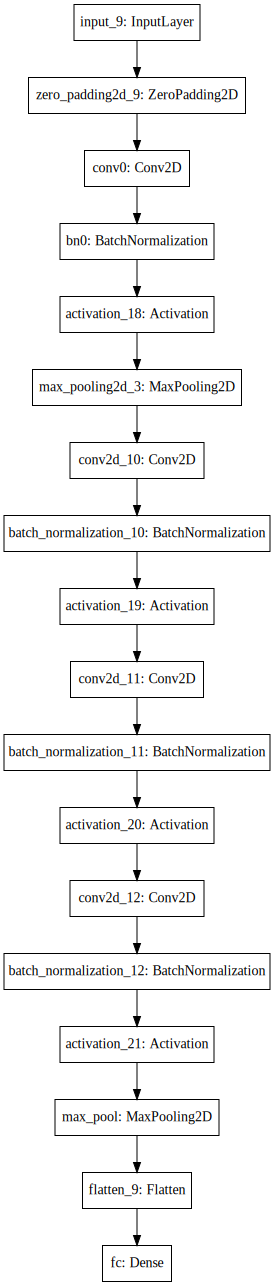

In [0]:
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))